In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
#os.chdir('/Users/Sriram/Desktop/DePaul/Q5/CSC529/Project 1/Analyzing-Housing-Data') # set to data dir
os.chdir('C:/Users/SYARLAG1/Desktop/Analyzing-Housing-Data')

In [3]:
# read in data
data = pd.read_csv('ames.csv', na_values='NA')
# data documentation: https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt

In [4]:
data.shape # 81 features

(2930, 82)

In [5]:
pd.set_option('display.max_columns', None)
data.head()

,Order,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,Lot.Config,Land.Slope,Neighborhood,Condition.1,Condition.2,Bldg.Type,House.Style,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,Roof.Style,Roof.Matl,Exterior.1st,Exterior.2nd,Mas.Vnr.Type,Mas.Vnr.Area,Exter.Qual,Exter.Cond,Foundation,Bsmt.Qual,Bsmt.Cond,Bsmt.Exposure,BsmtFin.Type.1,BsmtFin.SF.1,BsmtFin.Type.2,BsmtFin.SF.2,Bsmt.Unf.SF,Total.Bsmt.SF,Heating,Heating.QC,Central.Air,Electrical,X1st.Flr.SF,X2nd.Flr.SF,Low.Qual.Fin.SF,Gr.Liv.Area,Bsmt.Full.Bath,Bsmt.Half.Bath,Full.Bath,Half.Bath,Bedroom.AbvGr,Kitchen.AbvGr,Kitchen.Qual,TotRms.AbvGrd,Functional,Fireplaces,Fireplace.Qu,Garage.Type,Garage.Yr.Blt,Garage.Finish,Garage.Cars,Garage.Area,Garage.Qual,Garage.Cond,Paved.Drive,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [6]:
# converting variables into strings
data['Year.Built'] = data['Year.Built'].astype('str') # year
data['Yr.Sold'] = data['Yr.Sold'].astype('str') # year
data['MS.SubClass'] = data['MS.SubClass'].astype('str')
data['Overall.Qual'] = data['Overall.Qual'].astype('str')
data['Overall.Cond'] = data['Overall.Cond'].astype('str')
data['Bsmt.Full.Bath'] = data['Bsmt.Full.Bath'].astype('str') # discrete
data['Bsmt.Half.Bath'] = data['Bsmt.Half.Bath'].astype('str') # discrete
data['Full.Bath'] = data['Full.Bath'].astype('str') # discrete
data['Half.Bath'] = data['Half.Bath'].astype('str') # discrete
data['Bedroom.AbvGr'] = data['Bedroom.AbvGr'].astype('str') # discrete
data['Kitchen.AbvGr'] = data['Kitchen.AbvGr'].astype('str') # discrete
data['TotRms.AbvGrd'] = data['TotRms.AbvGrd'].astype('str') # discrete
data['Fireplaces'] = data['Fireplaces'].astype('str') # discrete
data['Garage.Yr.Blt'] = data['Garage.Yr.Blt'].astype('str') # year
data['Garage.Cars'] = data['Garage.Cars'].astype('str') # month
data['Mo.Sold'] = data['Mo.Sold'].astype('str') # year
data['Yr.Sold'] = data['Yr.Sold'].astype('str') # month

In [55]:
# we also convert all other string variables to dtype == 'category'
for feature in data.columns:
    if data[feature].dtype == 'object':
        data[feature] = data[feature].astype('category')

In [7]:
# clean the data
## remove unnecessary features (PID, Order)
del data['Order']
del data['PID']

In [8]:
## filling missing values
NaNLst = np.sum(data.isnull(),0) # missing value count by feature
NaNLst[NaNLst > 0]

Lot.Frontage       490
Alley             2732
Mas.Vnr.Type        23
Mas.Vnr.Area        23
Bsmt.Qual           80
Bsmt.Cond           80
Bsmt.Exposure       83
BsmtFin.Type.1      80
BsmtFin.SF.1         1
BsmtFin.Type.2      81
BsmtFin.SF.2         1
Bsmt.Unf.SF          1
Total.Bsmt.SF        1
Electrical           1
Fireplace.Qu      1422
Garage.Type        157
Garage.Finish      159
Garage.Area          1
Garage.Qual        159
Garage.Cond        159
Pool.QC           2917
Fence             2358
Misc.Feature      2824
dtype: int64

We deal with missing values in each feature seperately. 

As a first step, let us look at plots of how certain features relate to the Sales Price variable. 

Based on the relationship, we can either discard the feature or fill in the missing values

In [16]:
def generatePlots(featureLst,data):
    for feature in featureLst:
        if data[feature].dtype == 'object':
            sns.stripplot(data[feature], data['SalePrice'], jitter=True)
            plt.show()
        else:
            sns.regplot(data[feature],data['SalePrice'], dropna=True)
            plt.show()

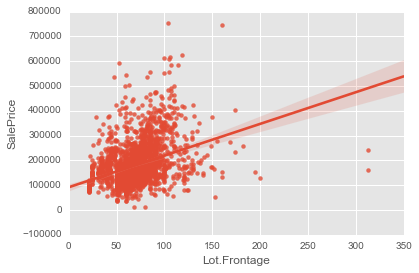

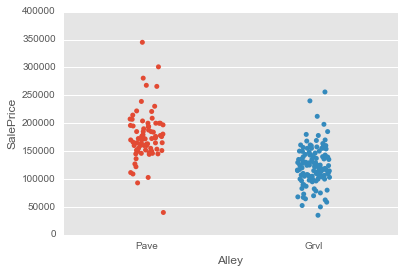

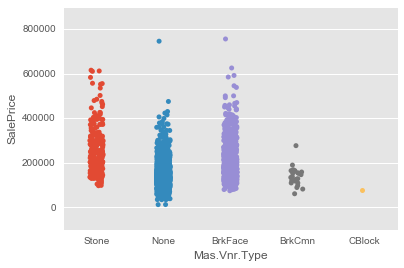

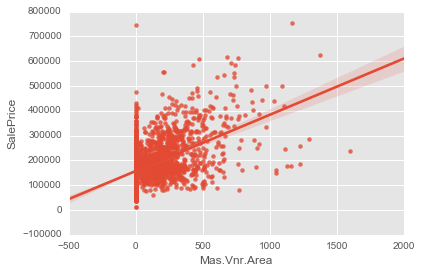

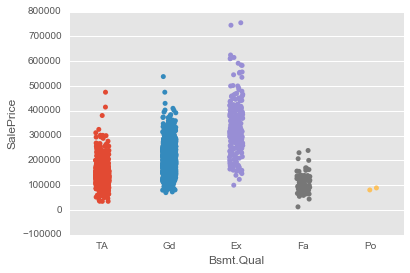

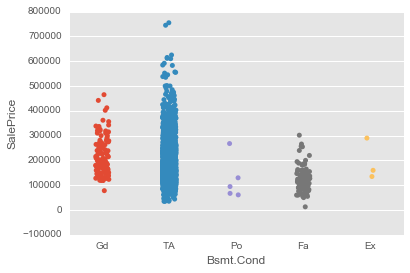

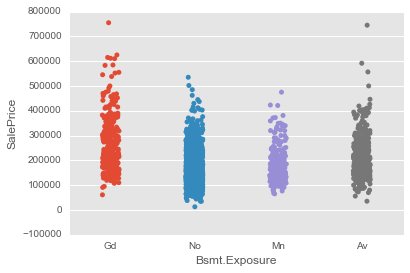

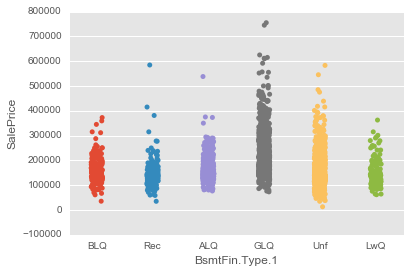

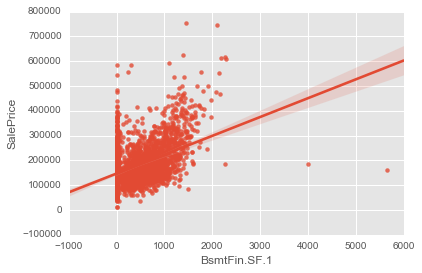

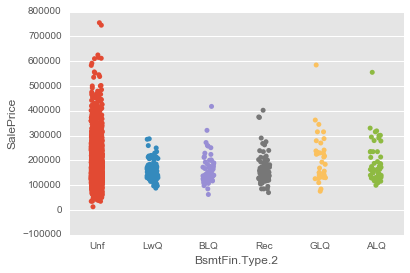

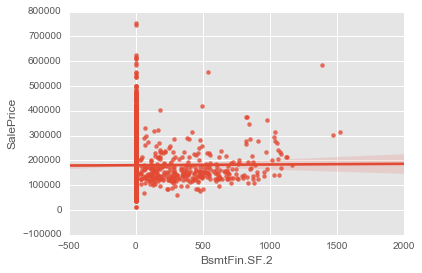

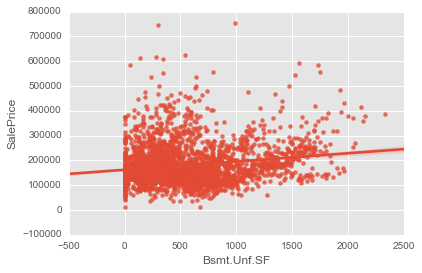

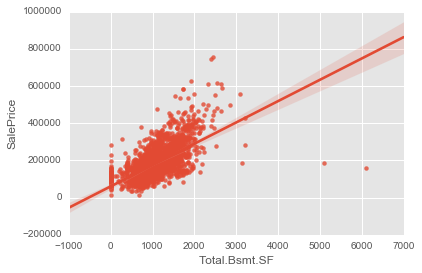

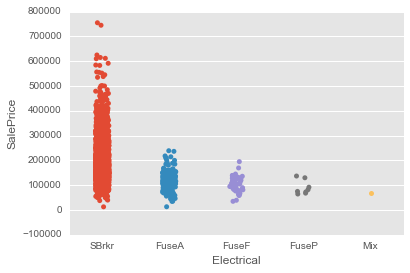

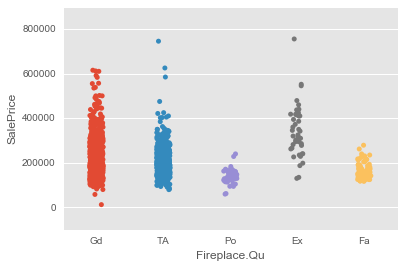

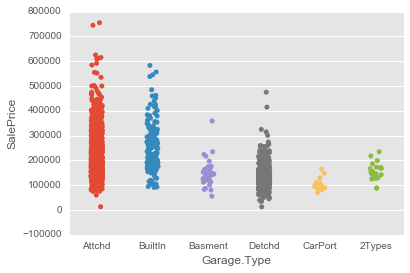

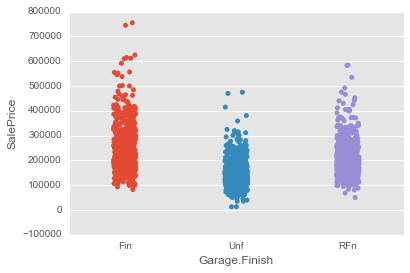

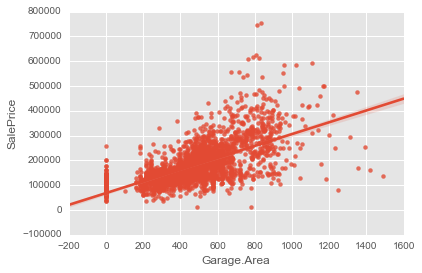

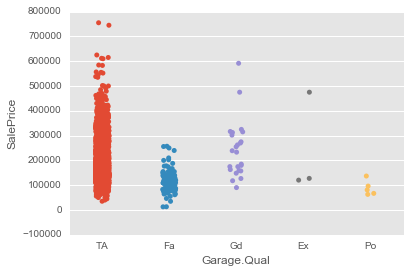

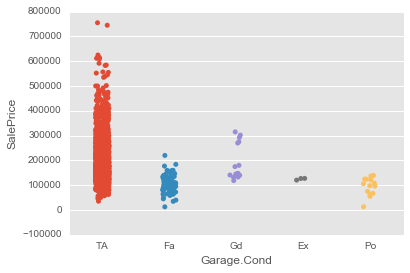

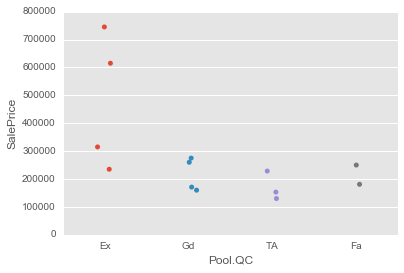

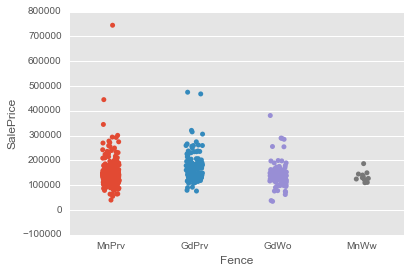

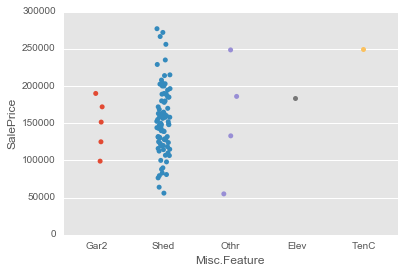

In [17]:
generatePlots(NaNLst[NaNLst > 0].index,data)

Based on these plots and the NA count, it is evident that not all features are necessary -- for example, Misc Feature seems unnecessary -- it doesnt seem to assist in predicting the Sales Price, and at the same time is very sparsely filled in. Hence, we discard such variables. 

Variables that will be removed based on this analysis: Pool.QC, Misc.Feature, Fence, and Fireplace.Qu.

Variables like Alley, also have a high number of missing values (2732), however, since we can see a clear different in sales categories between their various classes, we will not remove such variables.

In [18]:
del data['Pool.QC']
del data['Misc.Feature']
del data['Fence']
del data['Fireplace.Qu']

In [71]:
from sklearn import linear_model # needed to impute missing values of continuous variables 

def NAFill(featureLst, data):
    for feature in featureLst:
        newFeatureVec = data[feature]
        if data[feature].dtype == 'object': # if data type is categorical, fill in with category closest to avg of Sales Price
            categoryDict = {}
            for category in set(data[feature]):
                categoryDict[category] = np.mean(data[data[feature] == category]['SalePrice']) # creating a dict of the means
                for index, value in enumerate(newFeatureVec):
                    if ~value.isnull():
                        continue
                    # the index that corresponds to lowest price
                    closestSalesPriceValueIdx = min(range(len(categoryDict.values())),key=lambda i:\
                                                    abs(categoryDict.values()[i]-data['SalePrice'][index]))
                    # the missing value replaced by corresponding category
                    newFeatureVec[index] = categoryDict.keys()[closestSalesPriceValueIdx] 
        else: # if feature is continuous, use regression to fill in missing value 
            reg = linear_model.LinearRegression()
            # use only the non-missing value for model
            x = data[data[feature].notnull()]['SalePrice'].to_frame
            y = data[data[feature].notnull()][feature].to_frame
            reg.fit(x, y) 
            for index, value in enumerate(newFeatureVec):
                if value.notnull():
                    continue
                newFeatureVec[index] = reg.predict(data['SalePrice'][index])
        
        data[feature] = newFeatureVec
        return data

In [72]:
NaNLst = np.sum(data.isnull(),0)

NAFill(NaNLst[NaNLst > 0].index, data)

TypeError: float() argument must be a string or a number

In [59]:
np.array(data[data['Alley'].notnull()]['SalePrice']).shape


(198L,)

In [60]:
np.array(data[data['Alley'].notnull()]['Alley']).shape

(198L,)